<a href="https://colab.research.google.com/github/zJasonH/PracticeGit/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Word Embeddings

In this workshop, we will learn about word embeddings, train our own word embeddings, and then use the word embeddings for some cool applications!

First, let's talk about the basics of vectors—an important concept to grasp before we dive into the world of word embeddings.

## Vectors

A vector is an ordered collection of numbers that can represent various types of data. Each number in the vector is its element or component. You can also visualize it geometrically/in space.

For example, if we were to do some analytics on house prices and the only features we cared about were square footage and price. We might model each house with a pair of numbers, or a 2-d vector, where the first element indcates the square footage and price. Note that order matters!

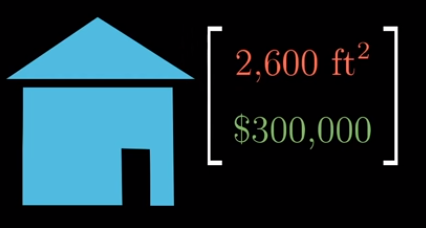

As you might have guessed, vectors can have many more dimensions! Although it can be difficult to visualize vectors that are in a higher than 3-d space. Any n-dimensional vector **v** can be specfied as [*v_1*,  ...,  *v_n*] where *v_1*, ..., *v_n* are the components of **v**.

Another important thing to understand about vectors are the operations you can do on them. Main ones relevant for this workshop include vector addition, subtraction and cosine similarity.

### Vector Addition

The sum of two vectors **u** = [*u_1*,  ...,  *u_n*] and **v** = [*v_1*,  ...,  *v_n*] would be the sum of the corresponding components of the two vectors: **u + v** = [*u_1 + v_1*,  ...,  *u_n + v_n*].

For example, adding **u** = [1, 3, 2] and **v** = [-1, 9, 0] gives us **u + v** = [0, 12, 2].

Of course the dimensions of the vectors you are adding must match.

### Vector Subtraction

The difference of two vectors **u** = [*u_1*,  ...,  *u_n*] and **v** = [*v_1*,  ...,  *v_n*] would be the difference of the corresponding components of the two vectors: **u - v** = [*u_1 - v_1*,  ...,  *u_n - v_n*].

For example, subtracting **v** = [-1, 9, 0] from **u** = [1, 3, 2] gives us **u - v** = [2, -6, 2].

Again, the dimensions of the vectors must match.

### Cosine Similarity

Cosine similarity is a measure of similarity between two vectors. It can take values in the interval [-1, 1], where a value of 1 indicates same vectors/similar vectors, 0 indicates independent vectors and -1 indicates strongly dissimilar vectors.

The value represents how similar the direction both vectors are pointing in based on the angle between them.

If you are curious and want to know how it is computed, you can learn more about it [here](https://www.geeksforgeeks.org/cosine-similarity/#).

Advanced intuition: Imagine we have vectors that have 1000 dimensions. There is a vast amount of empty space in such high dimensions, so everything is far from everything else! So we do not use something like Euclidian distance. Instead, we choose to measure how similar the vectors are by the direction they are pointing in that space.

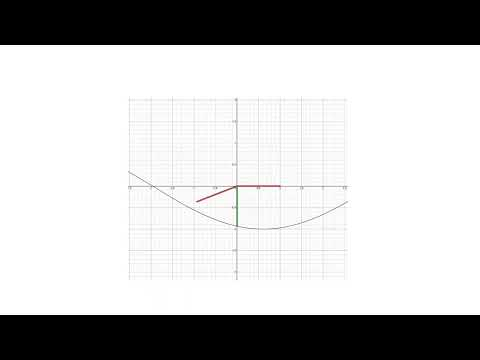

In [ ]:
# @title
from IPython.display import YouTubeVideo
YouTubeVideo('Hd9M0ZLxTnk', width=1000, height=1000)

Now that you have the necessary background knowledge about vectors, let's talk about a useful application of them: word embeddings!

Machines work with numbers. It is straightforward to think about how we can represent numerical data for Machine Learning models to use and operate on. But what about non-numerical data like text data for Natural Language Processing applications?

Vectors would be a good guess! Let's take a look at how we can use vectors to represent non-numerical data.

## Word Embeddings

Embeddings, in Machine Learning, are dense numerical representations of real-world objects and relationships, expressed as a vector.
So word embeddings, then, are embeddings for words. They represent words as continuous-valued vectors in a multi-dimensional space.

There are infinitely many choices for vectors that can be used to represent a specific word. The vectors can have any dimension, be it 3-d or 500-d. And each component can take any value between -∞ and ∞. So how do we know what are *good* vector representations of a word?

### Basic Characteristics of Good Word Embeddings

(1) Word embeddings should capture semantic relationships between words. This means words that have similar meanings or used in similar contexts should have vectors closer together in this vector space. For example, in the illustration below (colors are used instead of numbers) we can see that "man" and "woman" are much more similar to each other than either or them are to "king".

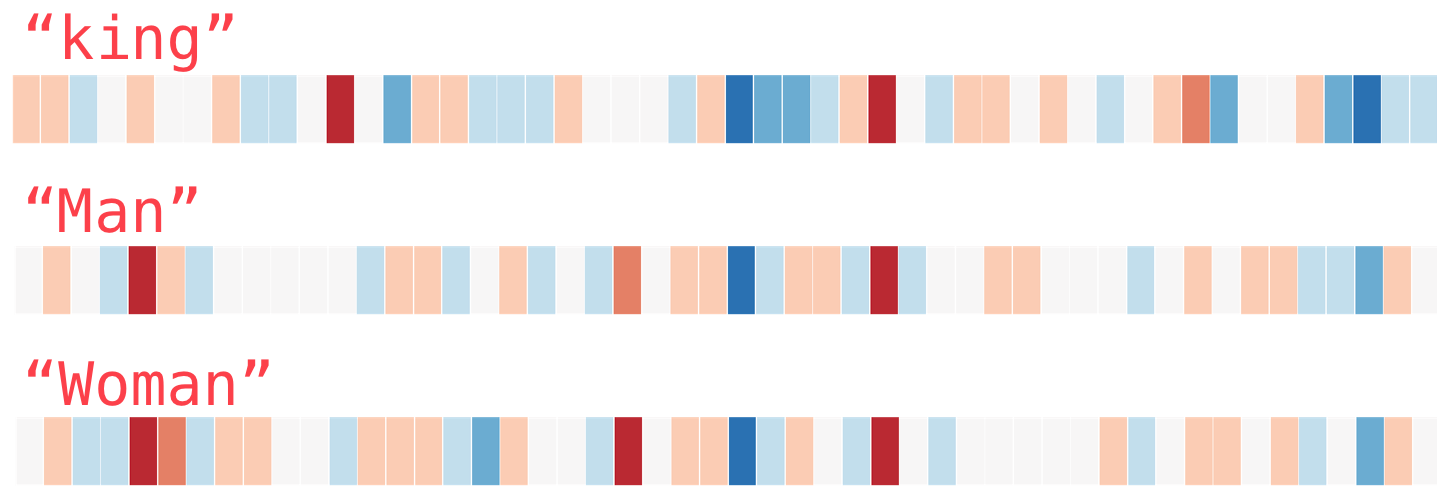

Here's another list of examples:

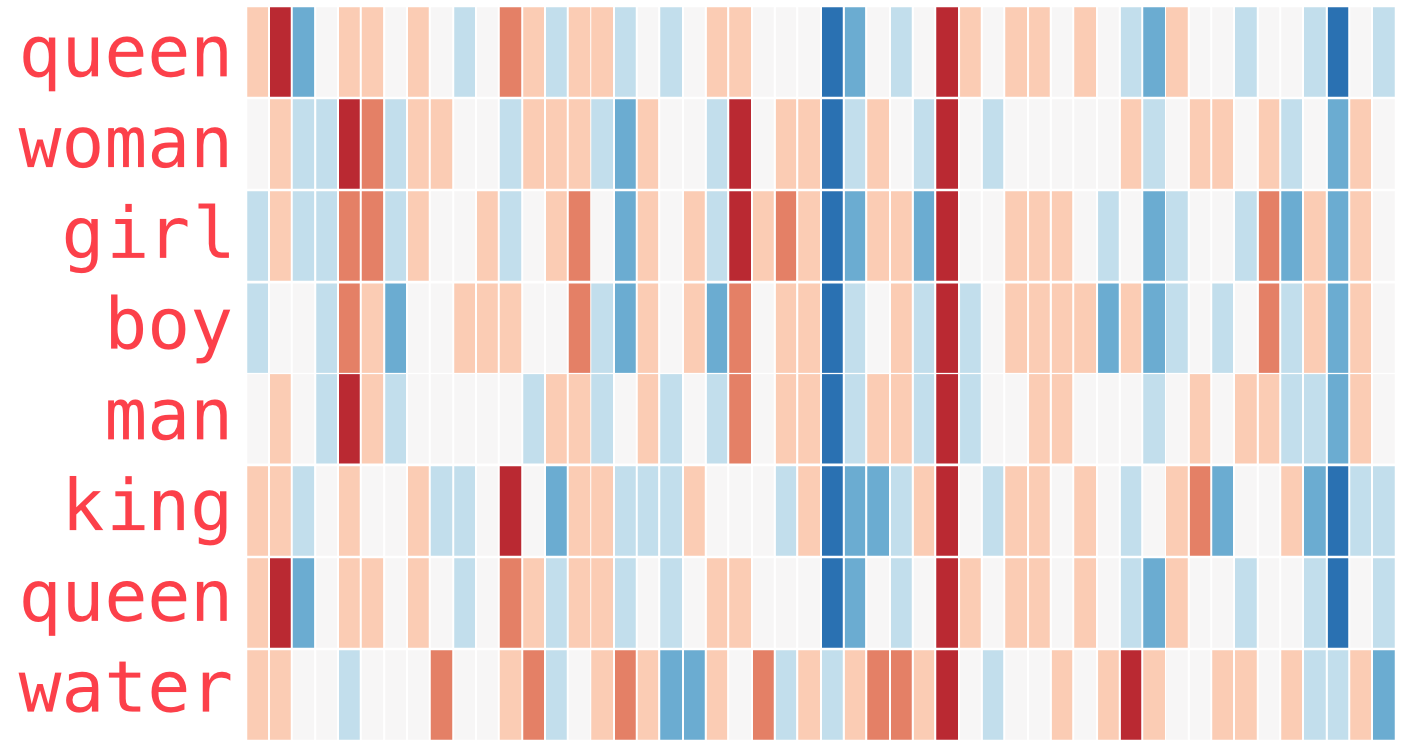

a. There's a straight red column through all of these different words. They're similar along that dimension

b. You can see how “woman” and “girl” are similar to each other in a lot of places. The same with “man” and “boy”

c. “boy” and “girl” also have places where they are similar to each other, but different from “woman” or “man”. These could possibly be coding for a vague conception of youth

d. All but the last word are words representing people. It's an object (water) to show the differences between categories. You can, for example, see that blue column going all the way down and stopping before the embedding for “water”.

e. There are clear places where “king” and “queen” are similar to each other and distinct from all the others. These could be coding for a vague concept of royalty

As you can see, these vector representations capture quite a bit of the information/meaning/associations of these words.

(2) High-quality word embeddings can solve analogical reasoning tasks. The most famous example is the formula: "king" - "man" + "woman"

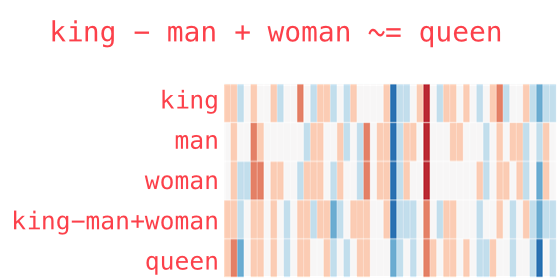

The resulting vector from "king-man+woman" doesn't exactly equal "queen", but "queen" is the closest word to it from all the other word embeddings in this collection

(3) Good word embeddings generalize well to unseen data. They should not be overly specific to the training corpus and should work for various domains

(4) Effective embeddings provide mechanisms for handling out-of-vocabulary words or rare words that were not present in the training data. This could involve techniques like subword embeddings or using a generic "unknown" token

### Using Word Embeddings for Sentence Representation

Word embeddings can be used to represent sentences as well!

A straightforward way to use word embeddings for sentences is through a vector of vectors (matrix). For example, if the word embeddings for "I", "like", "vectors" are [1, 8, 2], [1, 0, 1], and [1, 1, 3] respectively, the sentence "I like vectors" could be represented through [[1, 8, 2], [1, 0, 1], [1, 1, 3]].

As you might've noticed, sentences of different lengths would have different sizes.

Another simple way to do so is by averaging the embeddings (along each dimension) of all the words in the sentence. So for the same word embedding examples above, the sentence "I like vectors" could be represented as [1, 3, 2].

Note: Clearly, this might not be the best way to represent a sentence. Sentence embeddings do exist.

Now that we know conceptually how we can represent words and sentences and what good word embeddings look like, let's try training our own!

## Sources

1. http://jalammar.github.io/illustrated-word2vec/

2. https://www.youtube.com/watch?v=fNk_zzaMoSs&t=51s&ab_channel=3Blue1Brown

# Programming Part

# Initialization

In [ ]:
# run me if things don't work
%cd /content/word-embeddings-workshop/src
%load_ext autoreload
%autoreload 2

In [ ]:
!git clone https://dagshub.com/ML-Purdue/word-embeddings-workshop.git/
%cd word-embeddings-workshop
!pip install -r requirements.txt
!dvc pull -r origin
%cd src

In [ ]:
from gensim.models import KeyedVectors
from data.skipgram import Dataset
from w2v.arch import Word2Vec
from data.cbow import Dataset
from w2v.train import train
import pandas as pd
import torch
import const
import nltk

## Continuous Bag-of-Words Dataset

In [ ]:
dataset = Dataset(const.DATASET_PATH)
print(dataset[0])

## PyTorch Custom Word2Vec

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

dataset = Dataset(const.DATASET_PATH)
dataloader = torch.utils.data.DataLoader(dataset,
                                          shuffle=True,
                                          batch_size=const.BATCH_SIZE)

model = Word2Vec(len(dataset), const.VECTOR_DIMENSIONS).to(device)
print(model)

optimizer = torch.optim.SGD(model.parameters(),
                            lr=const.LEARNING_RATE,
                            momentum=const.MOMENTUM)
loss = torch.nn.CrossEntropyLoss()
train(model, optimizer, loss, dataloader)
torch.save(model, const.SAVE_MODEL_PATH / 'w2v.pt')

## Gensim Custom Word2Vec

In [ ]:
from gensim.models import Word2Vec
nltk.download('punkt')

In [ ]:
df = pd.read_csv(const.DATASET_PATH)
data = df[const.COLUMN_NAME].apply(nltk.word_tokenize)

model = Word2Vec(data,
                  min_count=1,
                  vector_size=const.VECTOR_DIMENSIONS)

model.save(str(const.SAVE_MODEL_PATH / 'trained-gensim.kv'))

In [ ]:
model.wv.most_similar('man')

In [ ]:
model.wv.most_similar(model.wv['king'] + model.wv['man'] + model.wv['woman'])

## Gensim Pretrained Word2Vec

In [ ]:
model = KeyedVectors.load_word2vec_format(const.PRETRAINED_MODEL_PATH, binary=True)

model.most_similar('man')
model.most_similar(model['king'] - model['man'] + model['woman'])

# Hacking Part

In [ ]:
from convokit import Corpus, download

corpus = Corpus(filename=download('subreddit-Purdue'))
with open('../data/purdue.csv', 'w') as f:
  f.write('Header\n' + '\n'.join([utterance.text for utterance in corpus.iter_utterances()]))

# Update Repository
(Ignore Me)

In [ ]:
import dagshub

dagshub.notebook.save_notebook('ML-Purdue/word-embeddings-workshop',
                               'notebook.ipynb',
                               commit_message='updated notebook',
                               versioning='dvc')